<a href="https://colab.research.google.com/github/catonChuang/catonTest/blob/master/Team9_AI%E8%AA%B2%E7%A8%8B%E7%A8%8B%E5%BC%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

C-RAN機房MFH劣化預測

In [ ]:
#check your data path
!ls '/content/drive/MyDrive/CHT_WORK/AI/MFH02.csv'
#download package you need
!pip install somepackage

/content/drive/MyDrive/CHT_WORK/AI/MFH02.csv
  Preparing metadata (setup.py) ... done
  Created wheel for somepackage: filename=somepackage-1.2.3-py3-none-any.whl size=9278 sha256=75190bd8c13f949d3d61c7a313195754c15cc449fe801003a53d20a341a0966e
  Stored in directory: /root/.cache/pip/wheels/2c/9e/c0/914c82167ec8a532e4d2a9eebdcd43845c58de9e830c27597c
Successfully built somepackage


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#資料讀取
# data analysis
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# sklearn and others
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import classification_report

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

import sklearn
import random as rnd

data_path = '/content/drive/MyDrive/CHT_WORK/AI/MFH02.csv'

obj_Data=pd.read_csv(data_path)

#obj_train.columns
#obj_Data.info()

obj_Data =obj_Data.drop('SITE', axis=1)
obj_Data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2129 entries, 0 to 2128
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SITE_TXPOWER   2129 non-null   float64
 1   SITE_RXPOWER   2129 non-null   float64
 2   RRU_TXPOWER    2129 non-null   float64
 3   RRU_RXPOWER    2129 non-null   float64
 4   STATUS         2129 non-null   int64  
 5   SITE_TXPOWER2  2129 non-null   float64
 6   SITE_RXPOWER2  2129 non-null   float64
 7   RRU_TXPOWER2   2129 non-null   float64
 8   RRU_RXPOWER2   2129 non-null   float64
 9   SITE_TXPOWER3  2129 non-null   float64
 10  SITE_RXPOWER3  2129 non-null   float64
 11  RRU_TXPOWER3   2129 non-null   float64
 12  RRU_RXPOWER3   2129 non-null   float64
 13  SITE_TXPOWER4  2129 non-null   float64
 14  SITE_RXPOWER4  2129 non-null   float64
 15  RRU_TXPOWER4   2129 non-null   float64
 16  RRU_RXPOWER4   2129 non-null   float64
dtypes: float64(16), int64(1)
memory usage: 282.9 KB


In [ ]:
#資料抽象 分出 訓練 和測試

X = obj_Data.drop('STATUS', axis=1)
y = obj_Data['STATUS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<a name="fr"></a>

# 隨機森林 (Random Forest)

- `n_estimators`: The number of trees in the forest.
- `criterion`: The function to measure the quality of a split. Supported criteria are "gini" for the Gini impurity and "entropy" for the information gain.
- `max_depth`: The maximum depth of the tree.
- `min_samples_split`: The minimum number of samples required to split an internal node.
- `min_samples_leaf`: The minimum number of samples required to be at a leaf node.
- `bootstrap`: Whether bootstrap samples are used when building trees. If False, the whole dataset is used to build each tree.
- `oob_score`: Whether to use out-of-bag samples to estimate the generalization accuracy.

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 預測資料
rf_clf_train_pred = rf_clf.predict(X_train)
rf_clf_test_pred = rf_clf.predict(X_test)
feature_names =["SITE_TXPOWER","SITE_RXPOWER","RRU_TXPOWER","RRU_RXPOWER","SITE_TXPOWER2","SITE_RXPOWER2","RRU_TXPOWER2","RRU_RXPOWER2","SITE_TXPOWER3","SITE_RXPOWER3","RRU_TXPOWER3","RRU_RXPOWER3","SITE_TXPOWER4","SITE_RXPOWER4","RRU_TXPOWER4","RRU_RXPOWER4"
]
target_names = ["正常", "劣化"]






In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import roc_curve, roc_auc_score

# 視覺化混淆矩陣
def plot_cf_matrix(y_test, y_pred, target_names):
    cf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
    df_matrix_df = pd.DataFrame(cf_matrix,index = target_names, columns = target_names)
    sns.heatmap(df_matrix_df, annot=True, cmap='RdYlBu', linewidth=.5, fmt='g', cbar=False)
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

In [ ]:
# Print the classification report
print(classification_report(
    y_true=y_train,
    y_pred=rf_clf_train_pred,
    target_names=target_names
    ))

              precision    recall  f1-score   support

          正常       1.00      1.00      1.00       838
          劣化       1.00      1.00      1.00       652

    accuracy                           1.00      1490
   macro avg       1.00      1.00      1.00      1490
weighted avg       1.00      1.00      1.00      1490



In [ ]:
print(classification_report(
    y_true=y_test,
    y_pred=rf_clf_test_pred,
    target_names=target_names
    ))

              precision    recall  f1-score   support

          正常       0.98      0.95      0.96       361
          劣化       0.94      0.97      0.96       278

    accuracy                           0.96       639
   macro avg       0.96      0.96      0.96       639
weighted avg       0.96      0.96      0.96       639



Tree plot - sklearn learn

In [ ]:
len(rf_clf.estimators_) # 樹的數量

100

/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 21155 (\N{CJK UNIFIED IDEOGRAPH-52A3}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_export.py:676: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  ann.update_bbox_position_size(renderer)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 27491 (\N{CJK UNIFIED IDEOGRAPH-6B63}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/

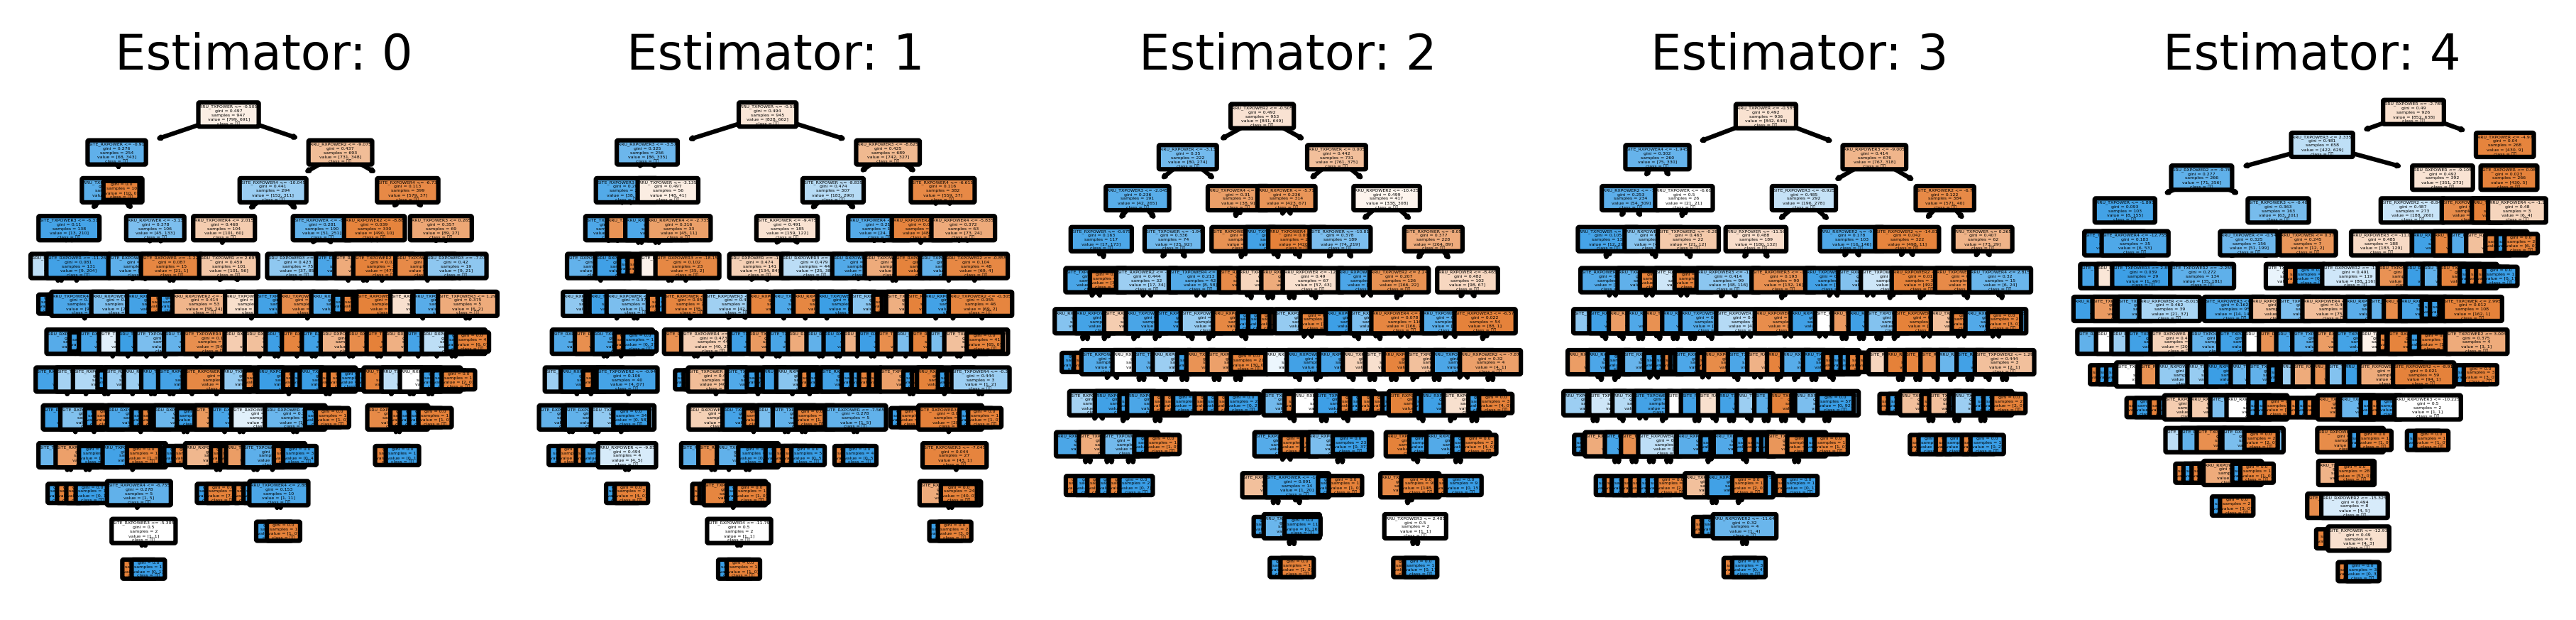

In [ ]:
from sklearn import tree
# 只看前5個
fig, axes = plt.subplots(nrows = 1,ncols = 5,figsize = (10,2), dpi=450)
for i_tree, tree_in_forest in enumerate(rf_clf.estimators_[:5]):
    dot_data = tree.plot_tree(tree_in_forest, feature_names=feature_names,
                class_names=target_names,
                filled=True, rounded=True,
                ax=axes[i_tree])
    axes[i_tree].set_title('Estimator: ' + str(i_tree), fontsize = 11)

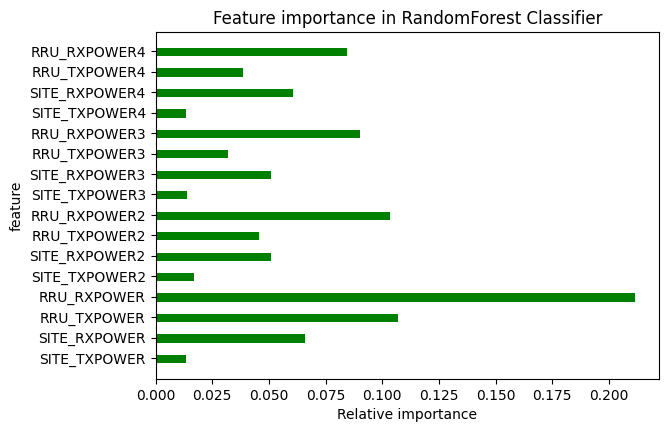

<Figure size 500x500 with 0 Axes>

In [ ]:
col = feature_names
y = rf_clf.feature_importances_   #欄位重要信
#plot
fig, ax = plt.subplots()
width = 0.4 # the width of the bars
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature')
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)